In [1]:
#The OS module in Python provides functions for interacting with the operating system.
import os
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error
import math
#Python tarfile module is used to read and write tar archives. 
import tarfile

#Из модуля six.moves импортируется обьект urllib. 
#Далее с помощью этого объекта происходит скачивание файла из интернета
from six.moves import urllib

#pandas is a fast, powerful, flexible and easy to use open source data analysis
#and manipulation tool, built on top of the Python programming language.
import pandas as pd

# %Matplotlib - это инструкция библиотекe matplotlib опираться на графический сервис сервера jupyter notebook.
# Эта инструкция применяется только для jupyter notebook
%matplotlib inline

# matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt

Загрузка данных с Git и сохранение на в локальный файл

In [136]:
# Имя переменной которая хранит ссылку из интернета.
download_path = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz'
#Это имя переменной которая хранит название папки . В которой сохраняется файл из интернета
housing_path = 'datasets/housing/'

In [137]:
def fetch_housing_data (url = download_path, path_h = housing_path, file_name = 'housing.tgz'):

#    проверяем, если нет директории с именем housing_path,то просим создать данную директорию
    if not os.path.isdir(path_h):
        os.makedirs(path_h)
# формируем путь к файлу, берем имя директории и файла и соединяем их вместе с помощью функции join:        
    tgz_path = os.path.join(path_h, file_name)
# происходит запрос файла и указывается путь,где файл ,сохраняет у нас на компе его    
    urllib.request.urlretrieve (url, tgz_path)
# открываем файл   
    tarf = tarfile.open(tgz_path)
    
# распаковываем файл
    tarf.extractall(path = path_h)
    
# закрываем файл
    tarf.close()    
    

In [138]:
fetch_housing_data()

Подъем файла с данными в память

In [139]:
# без данной функции файл бы просто скачался на компьютер
# и не загрузился бы в память в качестве DataFrame
# И мы не смогли бы вести анализ данных

def load_to_pandas (file_path = housing_path, file_name = 'housing.csv'):
    
    full_path = os.path.join(file_path, file_name)
    
    return pd.read_csv(full_path)

In [140]:
hdf = load_to_pandas()

Осмотр данных 

In [141]:
hdf.shape

(20640, 10)

In [142]:
hdf.head(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [143]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [144]:
#20640 - 20433

In [145]:
# Достаем конкретно нашу колонку объектиноготипа, остальные данные типа флоат , выше можно увидеть.
hdf['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Гистограммы

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

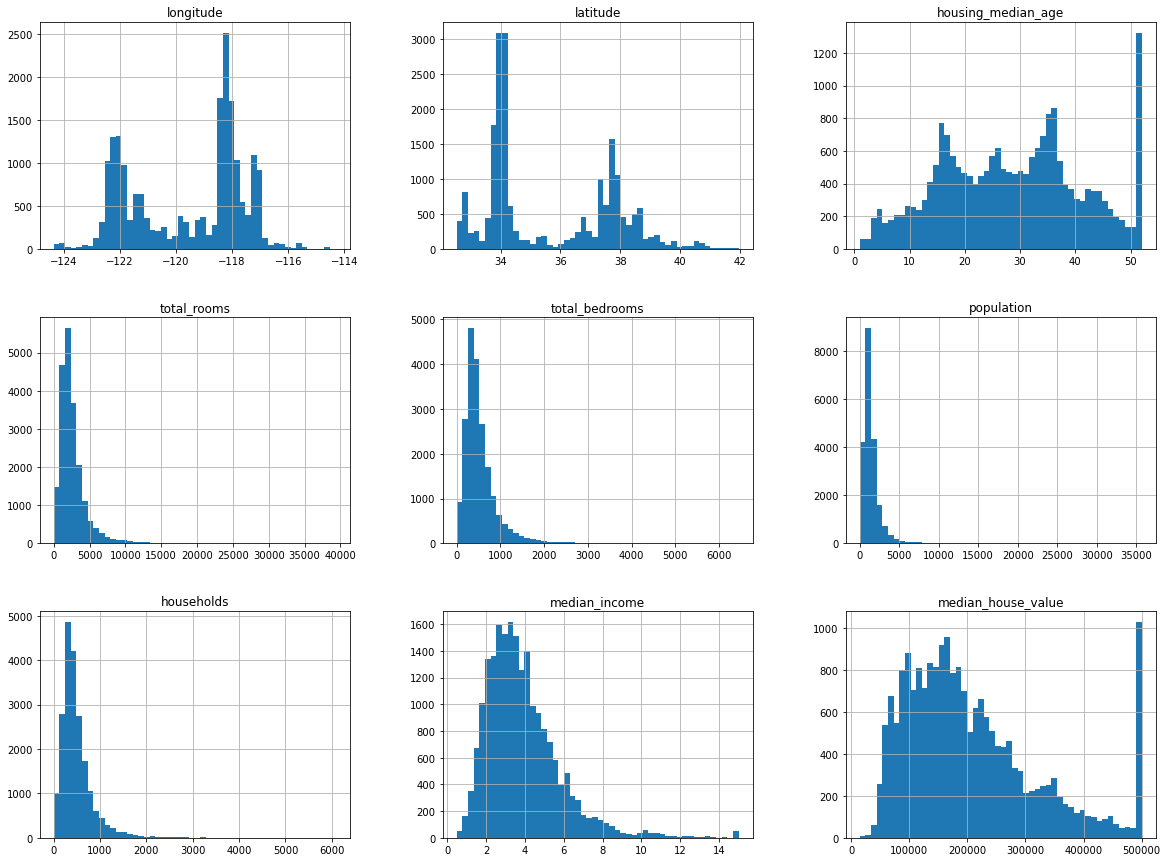

In [146]:
# median_income, median_age, median_value, масштабы и хвосты
hdf.hist(bins = 50, figsize = (20,15))

<AxesSubplot:>

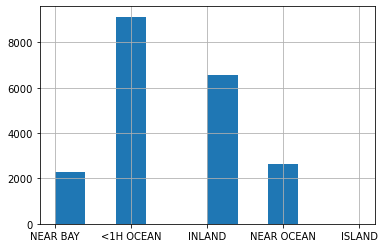

In [147]:
hdf['ocean_proximity'].hist()

Визуализация графических данных

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

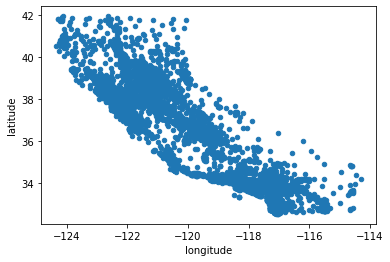

In [148]:
hdf.plot(kind='scatter', x='longitude', y = 'latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

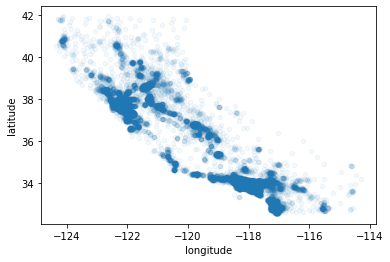

In [149]:
hdf.plot(kind='scatter', x='longitude', y = 'latitude', alpha = 0.05)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

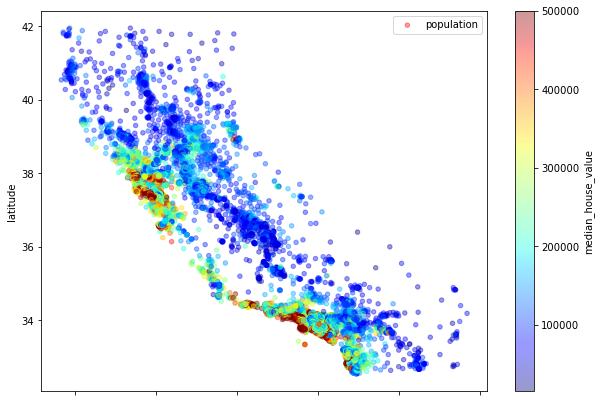

In [150]:
hdf.plot(kind='scatter', x='longitude', y = 'latitude', alpha = 0.4, label = "population", figsize = (10,7), 
           c = 'median_house_value', cmap = 'jet', colorbar = True)

Поиск зависимостей

In [151]:
corr_M = hdf.corr()
corr_M

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [152]:
#конкретно наша корелляция для средней стоимости дома,так как по условию задачи нам надо оценить среднюю стоимость жилья.
corr_M['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

Графическая матрица зависимостей

In [153]:
from pandas.plotting import scatter_matrix

In [154]:
#все переменные ,с наивысшем уровнем зависимости добавляем в лист.
attributes = ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms']

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='housing_median_age'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot

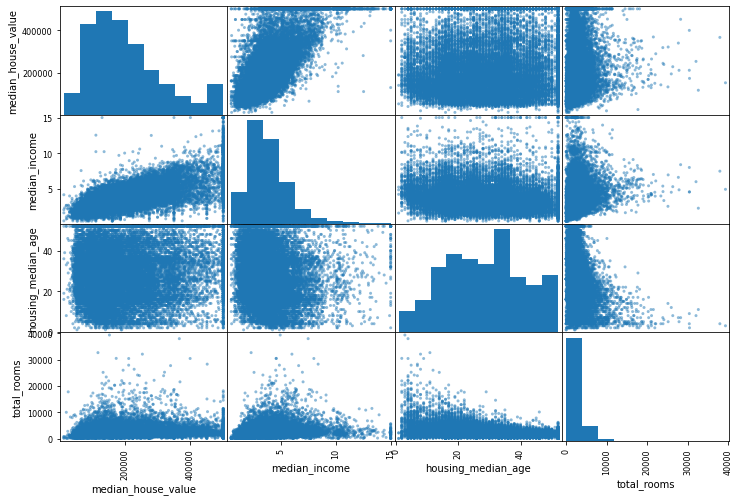

In [155]:
#
scatter_matrix(hdf[attributes], figsize = (12,8))

<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>

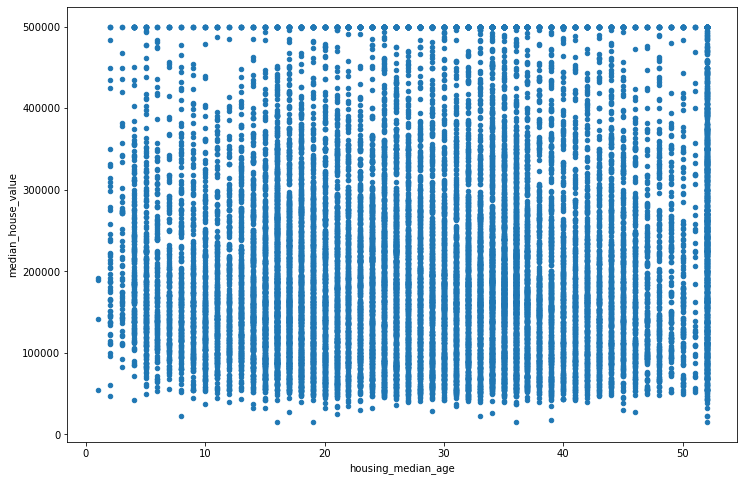

In [156]:
hdf.plot(kind='scatter', x='housing_median_age', y = 'median_house_value', figsize = (12,8))

In [157]:
hdf

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Новые атрибуты


In [158]:
hdf['rooms_per_house'] = hdf['total_rooms'] / hdf['households']
hdf['bebrooms_per_room'] = hdf['total_bedrooms'] / hdf['total_rooms']
hdf['population_per_house_hold'] = hdf['population'] / hdf['households']

In [159]:
corr_M = hdf.corr()
corr_M

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bebrooms_per_room,population_per_house_hold
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.092657,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.113815,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.136089,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.133798,-0.187900,-0.024581
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,0.084238,-0.028355
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.035319,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.080598,0.065087,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.326895,-0.615661,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.255880,-0.023737
rooms_per_house,-0.027540,0.106389,-0.153277,0.133798,0.001538,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.416952,-0.004852


In [160]:
# теперьпроверяем при добавлении новых атрбитов корреляцию
corr_M['median_house_value']

longitude                   -0.045967
latitude                    -0.144160
housing_median_age           0.105623
total_rooms                  0.134153
total_bedrooms               0.049686
population                  -0.024650
households                   0.065843
median_income                0.688075
median_house_value           1.000000
rooms_per_house              0.151948
bebrooms_per_room           -0.255880
population_per_house_hold   -0.023737
Name: median_house_value, dtype: float64

Обработка пустых значений

In [161]:
# у нас выше все данные были равны 20640, а total_bedrooms 20433, значит у нас есть нулевые значения и один из способов,
# что делать в данной ситуации,это либо удалить, либо найти медианное значение ,что мы и делаем дальше!
# dropna удаляет нулевые значения,subset мы задаем конкретно из какого места удалить.
hdf.dropna(subset = ['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bebrooms_per_room,population_per_house_hold
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


In [30]:
# либо варант вообще удалить данные столбец.
#hdf.drop(['total_bedrooms'], axis = 1)

In [162]:
# но мы ищем медиану ,и вместо нулевых значений вставляем ее.
mediantb = hdf['total_bedrooms'].median()
hdf['total_bedrooms'].fillna(mediantb, inplace = True)

medianpbr = hdf['bebrooms_per_room'].median()
hdf['bebrooms_per_room'].fillna(medianpbr, inplace = True)


In [163]:
# Отделение меток: нам теперь надо отделить нашу целевую переменную от всех остальных.
#мы разделяем и формируем новый dataset with library pandas

In [164]:
# берем наш набор данных и удаляем столбец (median_house_value)
# т.е. у нас будет переменная X без столбца(median_house_value) и переменная Y, содержащая только данный стоблец.
X = hdf.drop(['median_house_value'], axis = 1)

In [165]:
Y = hdf['median_house_value']

In [166]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_house,bebrooms_per_room,population_per_house_hold
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,5.329513,0.219892,2.123209


In [167]:
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

Обработка категориальных признаков

In [168]:
# мы факторизуем
h_cat_en, h_categories = X['ocean_proximity'].factorize()

In [169]:
#массив длины нашего dataset
h_cat_en

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [170]:
h_categories

Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')

In [171]:
from sklearn.preprocessing import OneHotEncoder
#  OneHotEncoder формирует разряженную матрицу!


In [172]:
oh = OneHotEncoder()

In [173]:
#передаем наш массив,но так как он у нас одномерный,нам надо сделать из него двумерный
coded = oh.fit_transform(h_cat_en.reshape(-1,1))

In [174]:
coded

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [175]:
#получим наш массив
coded.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [176]:
# создадим новый датафрейм из вышепредставленного массива,первый параметр наши данные,массив,
 # второй параметр,который возникнет слева, и передаем список с названием столбцов
# создается в итоге массив
proxy = pd.DataFrame(coded.toarray(), index = X.index, columns = ['1','2','3','4','5'])

In [177]:
proxy

,1,2,3,4,5
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
20635,0.0,0.0,1.0,0.0,0.0
20636,0.0,0.0,1.0,0.0,0.0
20637,0.0,0.0,1.0,0.0,0.0
20638,0.0,0.0,1.0,0.0,0.0


In [178]:
#X

In [179]:
# мы сцепляем наши датасеты,X, proxy, axis - это номер оси, по которой будет происходить сцепка.
X = pd.concat([X, proxy], axis = 1)

In [180]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_house,bebrooms_per_room,population_per_house_hold,1,2,3,4,5
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,0.146591,2.555556,1.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,0.155797,2.109842,1.0,0.0,0.0,0.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,0.129516,2.802260,1.0,0.0,0.0,0.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,0.184458,2.547945,1.0,0.0,0.0,0.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,0.172096,2.181467,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,5.045455,0.224625,2.560606,0.0,0.0,1.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,6.114035,0.215208,3.122807,0.0,0.0,1.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,5.205543,0.215173,2.325635,0.0,0.0,1.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,5.329513,0.219892,2.123209,0.0,0.0,1.0,0.0,0.0


In [181]:
#сбрасываем текстовое поле,так как выше мы его представили матрицей
X = X.drop(['ocean_proximity'], axis = 1)

In [182]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bebrooms_per_room,population_per_house_hold,1,2,3,4,5
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556,1.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842,1.0,0.0,0.0,0.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260,1.0,0.0,0.0,0.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,2.547945,1.0,0.0,0.0,0.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,2.181467,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,0.224625,2.560606,0.0,0.0,1.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,0.215208,3.122807,0.0,0.0,1.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,0.215173,2.325635,0.0,0.0,1.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,0.219892,2.123209,0.0,0.0,1.0,0.0,0.0


In [183]:
# масштабирование и стандартизация значений
# значения надо привести от 0 до 1 или от -1 до 0!!!

In [184]:
from sklearn.preprocessing import MinMaxScaler
#  MinMaxScaler() Берет мак и мин значение и вычитает одно из другого, получает модуль и все,что есть,делит на этот модуль
# и получается, что каждый наш столбец будет по минимуму и максимуму приведен к значениям от 0 до 1.
# плохо работает с выбросами, как есть у нас в данном примере, если есть выброс,лучше использоватьпример ниже с StandardScaler()
mms = MinMaxScaler()
X = mms.fit_transform(X)

In [185]:
X

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.        , 0.        ,
        0.        ],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.        , 0.        ,
        0.        ],
       [0.21015936, 0.5642933 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 1.        , 0.        ,
        0.        ],
       [0.30179283, 0.73219979, 0.33333333, ..., 1.        , 0.        ,
        0.        ],
       [0.30976096, 0.72582359, 0.29411765, ..., 1.        , 0.        ,
        0.        ]])

In [186]:
from sklearn.preprocessing import StandardScaler
# StandardScaler() вначале считает среднее значение по каждому столбику, 
# вычитает это среднее значения их всех элементов стоблца,и потом делит на стандартное отклонение
mms = StandardScaler()
X = mms.fit_transform(X)

In [187]:
X

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.68188905,
        -0.38446649, -0.01556621],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.68188905,
        -0.38446649, -0.01556621],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.68188905,
        -0.38446649, -0.01556621],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  1.46651424,
        -0.38446649, -0.01556621],
       [-0.87362627,  1.77823747, -0.84539315, ...,  1.46651424,
        -0.38446649, -0.01556621],
       [-0.83369581,  1.75014627, -1.00430931, ...,  1.46651424,
        -0.38446649, -0.01556621]])

Создание проверочного набора

In [188]:
# Нужно создатьданные для обучения и данные для проверки
from sklearn.model_selection import train_test_split
# импортируем функцию train_test_split и передаем массив независимых переменных : X и массив меток: Y 
# и она по одинаковым индексам разбивает каждый массив на 2:на обучение (X_train,Y_train) и тестирование (X_test,Y_test ),
# Создаем соотнеште в котором нам надо побить все (test_size = 0.2)- в данном случает в тестовое множество попадет 20% всего количества
#  random_state инициализирует генерацию случайных чисел

X_train, X_test, Y_train,  Y_test =  train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [189]:
X_train.shape, Y_train.shape

((16512, 16), (16512,))

READY to ROCK

In [190]:
from sklearn.linear_model import LinearRegression
#создаем объект,вызывая конструктор класса.
linreg = LinearRegression()

In [191]:
# у объекта linreg теперь берем метод fit и передаем наши обучащие данные и метки
linreg.fit(X_train, Y_train)

LinearRegression()

In [192]:
# берем наши тестовые наборы
someData = X_train[:6]
someLabels = Y_train[:6]

In [193]:
# прогноз, получим предсказание для каждого вектора
preds = linreg.predict(someData)

In [194]:
# Оценка на обучающем множестве

In [195]:
preds

array([181691.61658945, 290498.61658945, 244887.61658945, 146445.61658945,
       163222.00770273, 316828.00770273])

In [196]:
someLabels

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
17848    264800.0
Name: median_house_value, dtype: float64

In [197]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(preds, someLabels)
rmse = math.sqrt(mse)
rmse

70452.41989352895

Дерево решений

In [198]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [199]:
tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [200]:
preds = tree.predict (someData)

In [201]:
preds

array([103000., 382100., 172600.,  93400.,  96500., 264800.])

In [202]:
someLabels

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
17848    264800.0
Name: median_house_value, dtype: float64

In [203]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(preds, someLabels)
rmse = math.sqrt(mse)
rmse

0.0

Случайный лес

In [204]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

In [205]:
forest.fit(X_train, Y_train)

RandomForestRegressor()

In [206]:
preds = forest.predict (someData)

In [207]:
preds

array([109258.  , 389294.04, 198282.  ,  92852.  ,  96473.  , 273994.  ])

In [208]:
someLabels

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
17848    264800.0
Name: median_house_value, dtype: float64

In [209]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(preds, someLabels)
rmse = math.sqrt(mse)
rmse

11799.100025860727

GRID SEARCH

In [210]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]}

forest_reg = forest = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error')

In [211]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             scoring='neg_mean_squared_error')

In [212]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [213]:
grid_forest = grid_search.best_estimator_

In [214]:
preds = grid_forest.predict(someData)

In [215]:
preds

array([110730.        , 391226.73333333, 181373.33333333,  91933.33333333,
        99146.66666667, 273726.66666667])

In [216]:
someLabels

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
17848    264800.0
Name: median_house_value, dtype: float64

In [217]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(preds, someLabels)
rmse = math.sqrt(mse)
rmse

7174.757515634118

In [ ]:
# при наших корректировках имеем :
# при линейной регрессии результат:rmse =  70452.41989352895
# при дереве решений : rmse =  0
# при случайном лесе :rmse = 11799.100025860727
# при GRID SEARCH : rmse = 7174.757515634118
#

Оценка на проверочном множестве

In [ ]:
# это для меня!
from sklearn.linear_model import LinearRegression
#создаем объект,вызывая конструктор класса.
linreg = LinearRegression()

# у объекта linreg теперь берем метод fit и передаем наши обучащие данные и метки
linreg.fit(X_train, Y_train)


# берем наши тестовые наборы
someData = X_train[:6]
someLabels = Y_train[:6]

# прогноз, получим предсказание для каждого вектора
preds = linreg.predict(someData)



from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(preds, someLabels)
rmse = math.sqrt(mse)
rmse

In [84]:
X_test

array([[ 0.27936569,  0.20044873, -0.2891866 , ...,  1.46651424,
        -0.38446649, -0.01556621],
       [ 0.05475686, -0.23028292,  0.10810379, ...,  1.46651424,
        -0.38446649, -0.01556621],
       [-1.43265267,  1.01509336,  1.85618152, ..., -0.68188905,
        -0.38446649, -0.01556621],
       ...,
       [-1.23799169,  0.78568194, -0.2891866 , ..., -0.68188905,
        -0.38446649, -0.01556621],
       [-0.09498235,  0.53286119,  0.58485227, ...,  1.46651424,
        -0.38446649, -0.01556621],
       [ 0.59880935, -0.66101456, -0.92485123, ..., -0.68188905,
        -0.38446649, -0.01556621]])

In [85]:
Y_test

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
15362    263300.0
16623    266800.0
18086    500001.0
2144      72300.0
3665     151500.0
Name: median_house_value, Length: 4128, dtype: float64

In [84]:
# линейная регрессия
Linpreds = linreg.predict(X_test)
mse = mean_squared_error(Linpreds, Y_test)
rmse = math.sqrt(mse)
rmse
#средняя квадратичная ошибка

69130.10313050626

In [112]:

# берем наши тестовые наборы
someDataTest = X_test[:6]
someLabelsTest = Y_test[:6]

In [113]:
# прогноз, получим предсказание для каждого вектора
predsTest = linreg.predict(someDataTest)

In [114]:
predsTest

array([ 36566.61658945, 137656.61658945, 293550.61658945, 281825.61658945,
       263404.25770273, 182200.00770273])

In [115]:
someLabelsTest

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
13311    158700.0
Name: median_house_value, dtype: float64

In [116]:
# Дерево решений
from sklearn.tree import DecisionTreeRegressor

treeTest = DecisionTreeRegressor()

treeTest.fit(X_test,Y_test)


DecisionTreeRegressor()

In [117]:
predsTest = tree.predict(someDataTest)

In [118]:
predsTest

array([ 42500.,  76900., 500001., 231000., 150000., 125200.])

In [119]:
someLabelsTest

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
13311    158700.0
Name: median_house_value, dtype: float64

In [120]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(predsTest, someLabelsTest)
rmse = math.sqrt(mse)
rmse

55758.796017609035

In [121]:
# Случайный лес

from sklearn.ensemble import RandomForestRegressor
forestTest = RandomForestRegressor()

In [122]:
forestTest.fit(X_test, Y_test)

RandomForestRegressor()

In [123]:
predsTest = forestTest.predict(someDataTest)

In [124]:
predsTest

array([ 49928.  ,  53957.  , 455930.74, 226943.  , 270903.  , 164949.  ])

In [125]:
someLabelsTest

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
13311    158700.0
Name: median_house_value, dtype: float64

In [126]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(predsTest, someLabelsTest)
rmse = math.sqrt(mse)
rmse

19029.41367316923

In [128]:
# Случайный лес + подгон гиперпараметров

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]}

forest_regTest = forest = RandomForestRegressor()

grid_search = GridSearchCV(forest_regTest, param_grid, cv = 5, scoring = 'neg_mean_squared_error')




In [129]:
grid_search.fit(X_test, Y_test)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             scoring='neg_mean_squared_error')

In [130]:
grid_forest = grid_search.best_estimator_

In [131]:
predsTest = grid_forest.predict(someDataTest)

In [132]:
predsTest 

array([ 48026.66666667,  66876.66666667, 436770.6       , 226200.        ,
       276036.66666667, 153600.        ])

In [133]:
someLabelsTest

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
13311    158700.0
Name: median_house_value, dtype: float64

In [134]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(predsTest, someLabelsTest)
rmse = math.sqrt(mse)
rmse

27477.386917326126

In [ ]:
# with X_test, Y_test:
# при линейной регрессии результат:rmse =  69130.10313050626
# при дереве решений : rmse =  55758.796017609035
# при случайном лесе :rmse = 19029.41367316923
# при GRID SEARCH : rmse = 27477.386917326126
#

ДЗ 
1. Допишите в блоках сверху оценки на проверочном наборе для моделей: Дерево решений, Случайный лес, 
    Случайный лес после поиска гиперпараметров, по аналогии с оценками линейной модели.
2. Попробуйте не добавлять новые признаки в набор данных - как изменятся оценки?
3. Попробуйте изменить метод обработки пустых значений - как изменятся оценки?
4. Попробуйте не применять масштабирование / нормирование данных - сработают ли модели?
 